In [1]:
#import libraries
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
#open King County House Data with pandas

kc_housing = pd.read_csv('kc_house_data.csv')

#data size: 21597 rows x 21 columns

In [3]:
kc_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
kc_housing = kc_housing.drop(columns = ['id','date','sqft_basement','zipcode', 'lat', 'long', 'waterfront', 'yr_renovated'])

In [5]:
kc_housing = kc_housing.dropna()

In [6]:
kc_housing.shape

(21534, 13)

count      21534.000000
mean      540057.663834
std       366059.581231
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

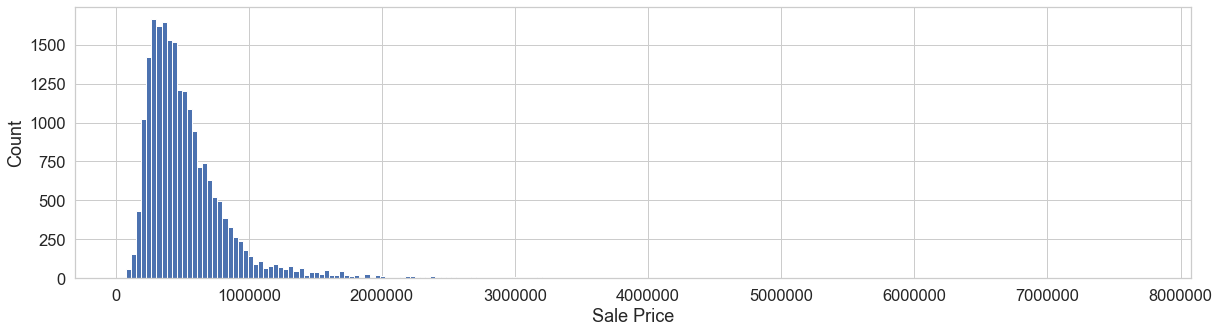

In [7]:
#Visualization 1:
#review the distribution of price 
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')

#distribution is skewed to the right

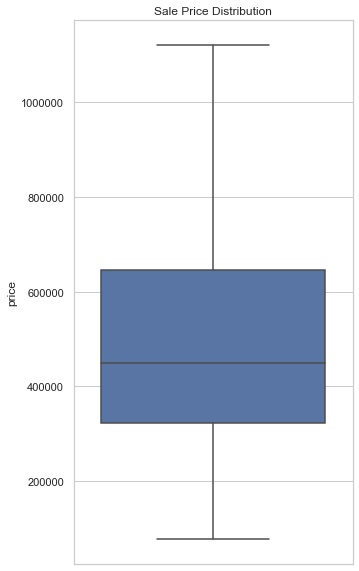

In [8]:
#Visualization 2:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=kc_housing["price"],showfliers=False)
plt.title("Sale Price Distribution")
ax 

In [9]:
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.701587
grade            0.668307
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
view             0.395734
bedrooms         0.308063
floors           0.257052
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
condition        0.035393
Name: price, dtype: float64


Text(0.5, 1.0, 'Sqft Living Vs Price')

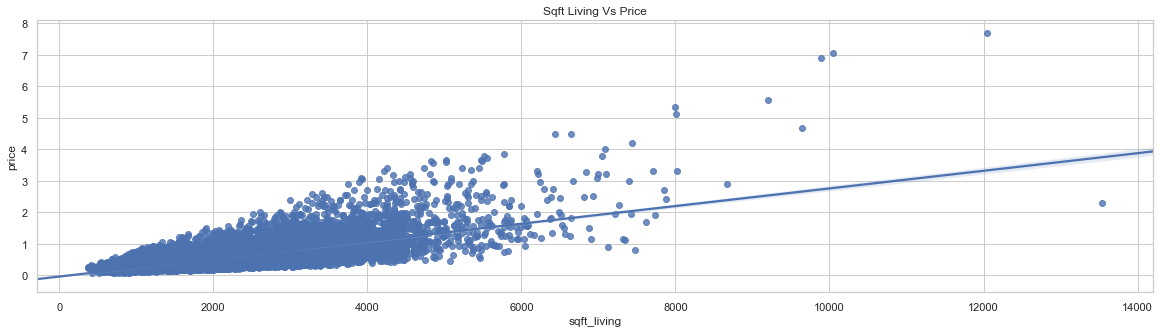

In [10]:
#Visualization 3: 
sqft_living = kc_housing['sqft_living']
price = kc_housing['price']/1000000
sqftliving = pd.DataFrame(kc_housing, columns = ['sqft_living', 'price'])
sns.regplot(x= sqft_living, y=price, data=sqftliving).set_title('Sqft Living Vs Price')

Text(0.5, 1.0, 'House Grade vs Price')

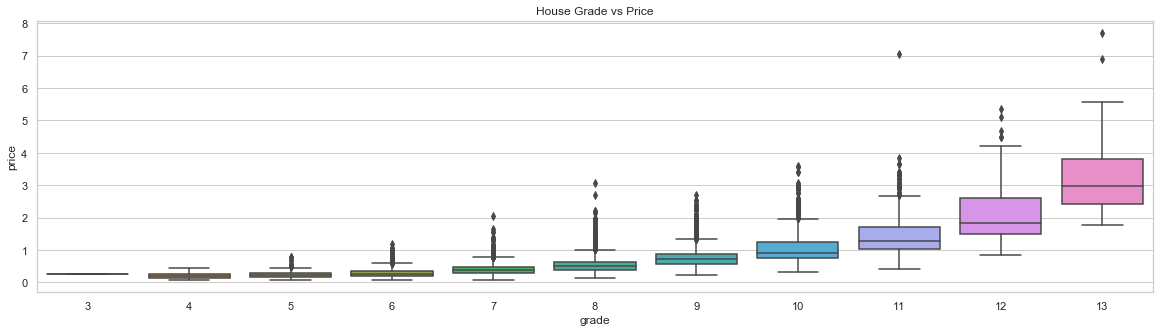

In [11]:
# Visualization 4:
grade = kc_housing['grade']
price= kc_housing['price']/1000000
grade_df = pd.DataFrame(kc_housing, columns = ['grade', 'price'])
sns.boxplot(x= grade, y=price, data=grade_df).set_title('House Grade vs Price')


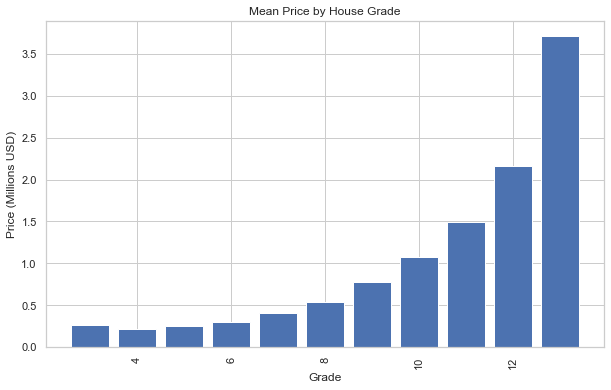

In [12]:
#Visualization 5
freq_grade = kc_housing['grade'].value_counts()
freq_grade_list = list(freq_grade.head(13).keys())

main_df_grade = []
for n in freq_grade_list:
    main_df_grade.append(kc_housing.loc[(kc_housing['grade'] == n)])


main_df_grade = pd.concat(main_df_grade)
grade_price = main_df_grade.groupby(kc_housing['grade']).mean()

grade_price = grade_price.sort_values(by='price',ascending=False)
X = grade_price.index
y = grade_price['price']/1000000
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

plt.bar(X,y)

# ax.set_xticks(range(len(x)))
# ax.set_xticklabels(x)
plt.xticks(rotation=90)
plt.title('Mean Price by House Grade')
plt.xlabel('Grade')
plt.ylabel('Price (Millions USD)')
plt.savefig('Bar_Chart')
plt.show()

In [13]:
kc_housing.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.395734,0.035393,0.668307,0.605695,0.054273,0.585304,0.083189
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.078523,0.026402,0.356095,0.479148,0.155462,0.392874,0.030952
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.186451,-0.126682,0.665312,0.686173,0.507565,0.569139,0.088854
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.282532,-0.059783,0.762398,0.876553,0.318217,0.756208,0.184801
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.075298,-0.008375,0.115122,0.184325,0.052646,0.145142,0.717095
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.028436,-0.264138,0.458694,0.523367,0.489410,0.279176,-0.010850
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,1.000000,0.045735,0.249727,0.166299,-0.054564,0.279561,0.073332
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.045735,1.000000,-0.147326,-0.158830,-0.361398,-0.093172,-0.002702
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.249727,-0.147326,1.000000,0.755977,0.448255,0.713462,0.121435
sqft_above,0.605695,0.479148,0.686173,0.876553,0.184325,0.523367,0.166299,-0.158830,0.755977,1.000000,0.423999,0.731543,0.195413


In [14]:
# use statsmodel to assess multivariables 
# Define variables:
# X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view','condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']].values
X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view','condition', 'grade', 'yr_built', 'sqft_living15', 'sqft_lot15']].values
y = kc_housing['price'].values

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()


multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3802.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:07:57   Log-Likelihood:            -2.9546e+05
No. Observations:               21534   AIC:                         5.909e+05
Df Residuals:                   21523   BIC:                         5.910e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.339e+06   1.33e+05     47.708      0.000    6.08e+06     6.6e+06
x1         -4.217e+04   2073.142    -20.340      0.000   -4.62e+04   -3.81e+04
x2          4.689e+04   3497.773     13.406      0.000       4e+04    5.37e+04
x3           165.6624      3.656     45.315      0.000     158.497     172.828
x4          2.764e+04   3504.640      7.886      0.000    2.08e+04    3.45e+04
x5          7.013e+04   2107.846     33.270      0.000     6.6e+04    7.43e+04
x6          1.905e+04   2508.178      7.597      0.000    1.41e+04     2.4e+04
x7          1.195e+05   2291.576     52.154      0.000    1.15e+05    1.24e+05
x8         -3638.2022     68.444    -53.156      0.000   -3772.357   -3504.047
x9            20.2553      3.597      5.631      0.000      13.205      27.306
x10           -0.5651      0.057     -9.951      0.000      -0.676      -0.454
==============================================================================
Omnibus:                    16958.168   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1276274.220
Skew:                           3.233   Prob(JB):                         0.00
Kurtosis:                      40.157   Cond. No.                     2.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
kc_housing = kc_housing.drop(columns = ['sqft_lot', 'sqft_above'])

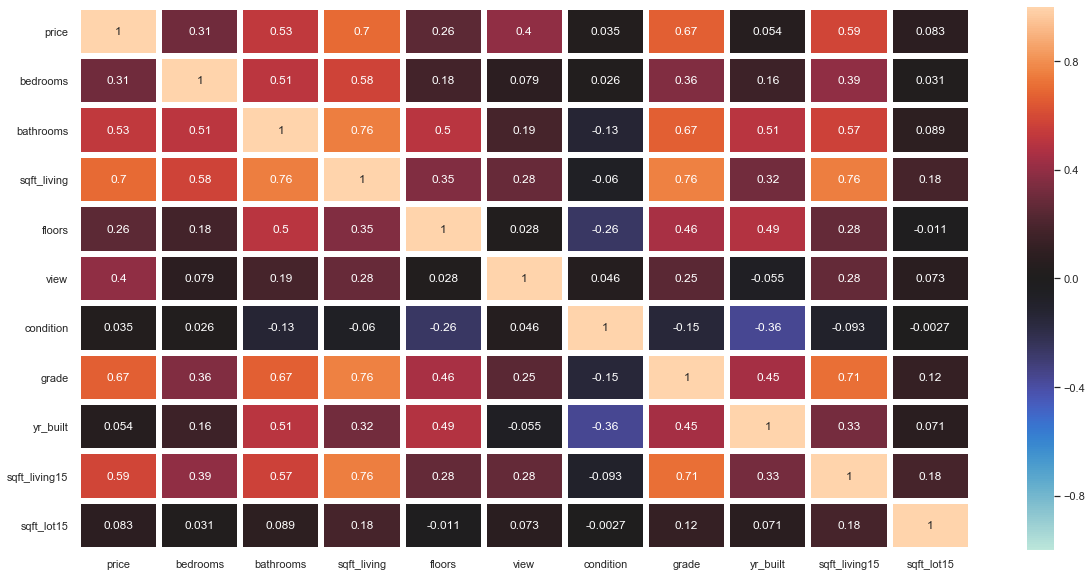

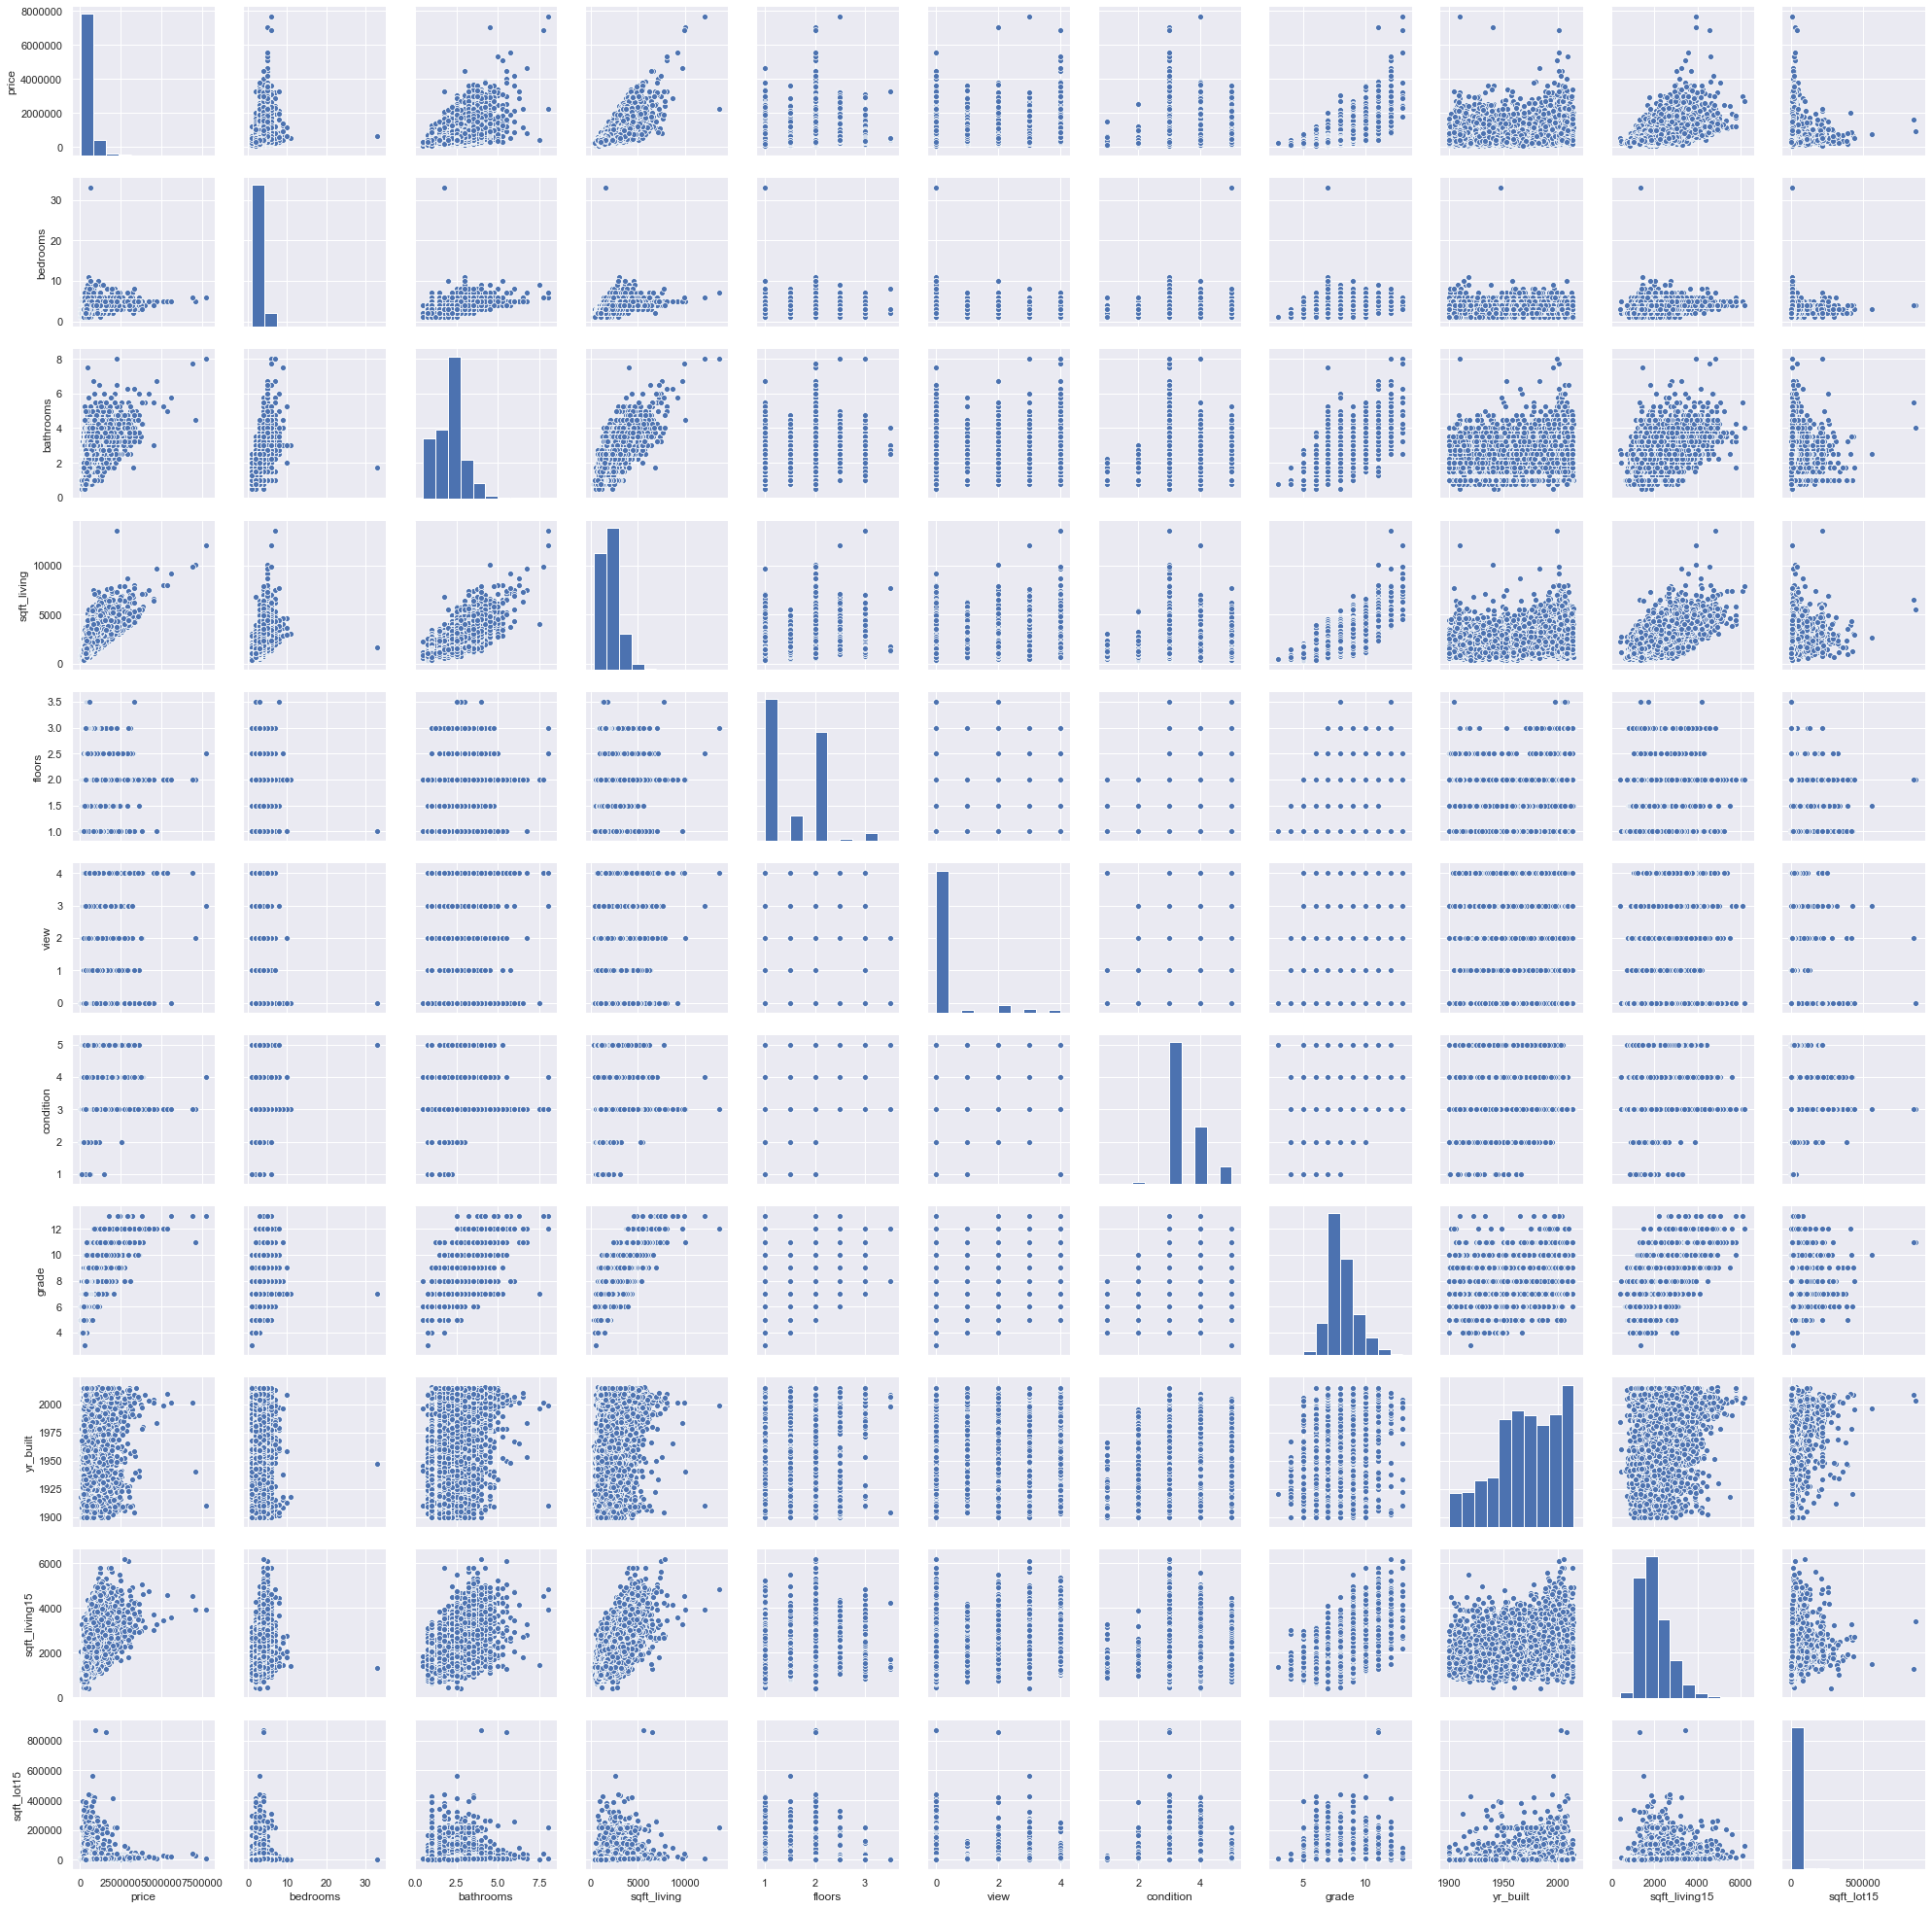

In [16]:
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()